## Predict META Stock Price with Linear Regression

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
import yfinance as yf

In [6]:
# DownLoad the META stock data
meta = yf.download('META', start='2024-11-22', end='2025-08-01')
meta

/tmp/ipykernel_12055/830471816.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  meta = yf.download('META', start='2024-11-22', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2024-11-22,557.763611,562.442068,553.224823,562.162728,9164000
2024-11-25,563.718811,571.180438,555.020307,560.716211,13599800
2024-11-26,572.128052,576.078325,563.808617,564.606635,10356600
2024-11-27,567.798828,573.564568,562.711346,573.474824,7200200
2024-11-29,572.906189,577.036012,565.504472,567.599278,7130500
...,...,...,...,...,...
2025-07-25,712.679993,720.650024,711.900024,716.919983,8271700
2025-07-28,717.630005,724.739990,712.679993,715.200012,8715700


In [21]:
meta.columns = meta.columns.droplevel(level=1)

In [22]:
# Show the data
meta

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-11-22,557.763611,562.442068,553.224823,562.162728,9164000
2024-11-25,563.718811,571.180438,555.020307,560.716211,13599800
2024-11-26,572.128052,576.078325,563.808617,564.606635,10356600
2024-11-27,567.798828,573.564568,562.711346,573.474824,7200200
2024-11-29,572.906189,577.036012,565.504472,567.599278,7130500
...,...,...,...,...,...
2025-07-25,712.679993,720.650024,711.900024,716.919983,8271700
2025-07-28,717.630005,724.739990,712.679993,715.200012,8715700
2025-07-29,700.000000,724.469971,699.909973,720.000000,13267000


In [25]:
# Prepare the data for regression
# Create a feature representing days since the start
meta['Day'] = np.arange(len(meta))

# Set up X: day number and y: close price
X = meta[['Day']].values
y = meta['Close'].values

In [26]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# Predict the next day price
next_day = np.array([[len(meta)]])
next_close = model.predict(next_day)

predicted_price = next_close[0].item()

# Print the predicted close price
print(f"Predicted Closing Price for META on the next trading day: ${predicted_price:.2f}")

Predicted Closing Price for META on the next trading day: $681.26


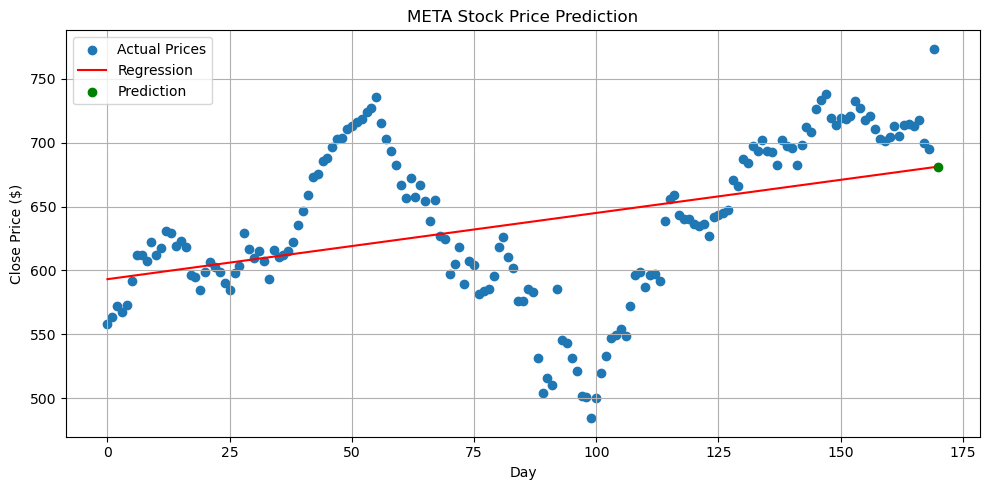

In [30]:
# Visualize data
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Actual Prices')
plt.plot(X, model.predict(X), color='red', label='Regression')
plt.scatter(next_day, next_close, color='green', label='Prediction')
plt.xlabel('Day')
plt.ylabel('Close Price ($)')
plt.title('META Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()